In [2]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 33.9 MB/s 
     |████████████████████████████████| 122 kB 60.8 MB/s 
     |████████████████████████████████| 6.8 MB 5.2 MB/s 
     |████████████████████████████████| 10.4 MB 32.4 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 167 kB 17.1 MB/s 
     |████████████████████████████████| 262 kB 66.9 MB/s 
     |████████████████████████████████| 1.3 MB 65.6 MB/s 
     |████████████████████████████████| 2.0 MB 54.4 MB/s 
     |████████████████████████████████| 17.9 MB 58.2 MB/s 
     |████████████████████████████████| 1.7 MB 53.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 7.7 MB/s 
     |████████████████████████████████|

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import pycaret

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display

pd.options.display.max_rows = 10000
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 1000

In [4]:
print("lightgbm ver : ", lgb.__version__)
print("pycaret ver : ", pycaret.__version__)

lightgbm ver :  2.2.3
pycaret ver :  2.3.10


In [5]:
dirname = "data/4th_kaggle"

train = pd.read_csv(os.path.join(dirname, 'train.csv'), index_col='id')
test = pd.read_csv(os.path.join(dirname, 'test.csv'), index_col='id')

train.shape, test.shape

((26049, 15), (6512, 14))

In [6]:
# 데이터 살펴보기
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
id,,,,,,,,,,,,,,,
0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


In [7]:
# 데이터 구조
print('Rows: {} Columns: {}'.format(train.shape[0], train.shape[1]))
print('Rows: {} Columns: {}'.format(test.shape[0], test.shape[1]))

Rows: 26049 Columns: 15
Rows: 6512 Columns: 14


In [8]:
### 데이터 정보 확인
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26049 entries, 0 to 26048
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26049 non-null  int64 
 1   workclass       26049 non-null  object
 2   fnlwgt          26049 non-null  int64 
 3   education       26049 non-null  object
 4   education_num   26049 non-null  int64 
 5   marital_status  26049 non-null  object
 6   occupation      26049 non-null  object
 7   relationship    26049 non-null  object
 8   race            26049 non-null  object
 9   sex             26049 non-null  object
 10  capital_gain    26049 non-null  int64 
 11  capital_loss    26049 non-null  int64 
 12  hours_per_week  26049 non-null  int64 
 13  native_country  26049 non-null  object
 14  income          26049 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6512 entries, 0 to 6511
Data columns (total

(None, None)

In [9]:
### 통계적 요약
display(train.describe().T)
display(test.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,26049.0,38.569235,13.671489,17.0,28.0,37.0,48.0,90.0
fnlwgt,26049.0,190304.481708,105966.299073,13769.0,118108.0,178866.0,237735.0,1484705.0
education_num,26049.0,10.088372,2.567610,1.0,9.0,10.0,12.0,16.0
capital_gain,26049.0,1087.689700,7388.854690,0.0,0.0,0.0,0.0,99999.0
capital_loss,26049.0,87.732734,403.230205,0.0,0.0,0.0,0.0,4356.0
hours_per_week,26049.0,40.443126,12.361850,1.0,40.0,40.0,45.0,99.0


,count,mean,std,min,25%,50%,75%,max
age,6512.0,38.631296,13.516418,17.0,28.00,37.0,48.00,90.0
fnlwgt,6512.0,187673.824939,103849.326430,12285.0,116504.25,176882.0,235850.75,1125613.0
education_num,6512.0,10.049908,2.593033,1.0,9.00,10.0,12.00,16.0
capital_gain,6512.0,1037.483876,7371.453668,0.0,0.00,0.0,0.00,99999.0
capital_loss,6512.0,85.588145,401.904741,0.0,0.00,0.0,0.00,4356.0
hours_per_week,6512.0,40.414773,12.290491,1.0,40.00,40.0,45.00,99.0


In [10]:
# null 값이 존재하는지 확인
dat = (train.isnull().sum() / train.shape[0]) * 100
round(dat, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education_num     0.0 %
marital_status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital_gain      0.0 %
capital_loss      0.0 %
hours_per_week    0.0 %
native_country    0.0 %
income            0.0 %
dtype: object

In [11]:
dat = (train.isin(['?']).sum() / train.shape[0])
round(dat, 2).astype(str) + ' %'

age                0.0 %
workclass         0.06 %
fnlwgt             0.0 %
education          0.0 %
education_num      0.0 %
marital_status     0.0 %
occupation        0.06 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital_gain       0.0 %
capital_loss       0.0 %
hours_per_week     0.0 %
native_country    0.02 %
income             0.0 %
dtype: object

In [12]:
dat = (test.isin(['?']).sum() / train.shape[0])
round(dat, 2).astype(str) + ' %'

age                0.0 %
workclass         0.01 %
fnlwgt             0.0 %
education          0.0 %
education_num      0.0 %
marital_status     0.0 %
occupation        0.01 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital_gain       0.0 %
capital_loss       0.0 %
hours_per_week     0.0 %
native_country     0.0 %
dtype: object

In [13]:
# 소득 비율
income = train['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

<=50K    75.8 %
>50K     24.2 %
Name: income, dtype: object

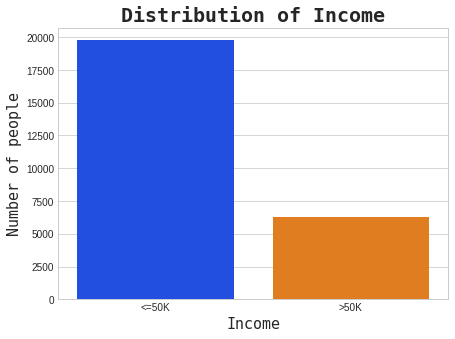

In [14]:
# Creating a barplot for 'Income'
income = train['income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='bright')

plt.title('Distribution of Income', 
          fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})

plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})

plt.tick_params(labelsize=10)
plt.show()

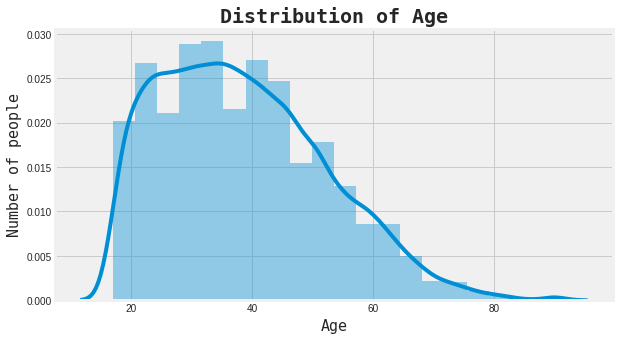

In [15]:
# Creating a distribution plot for 'Age'
age = train['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(train['age'], bins=20)

plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})

plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})

plt.tick_params(labelsize=10)
plt.show()

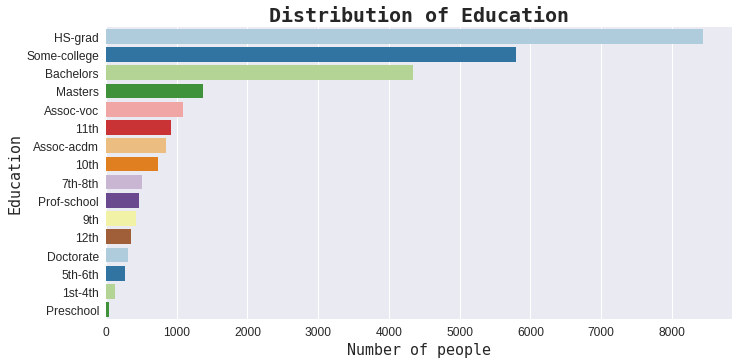

In [16]:
# Creating a barplot for 'Education'
edu = train['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')

plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 
                                  'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

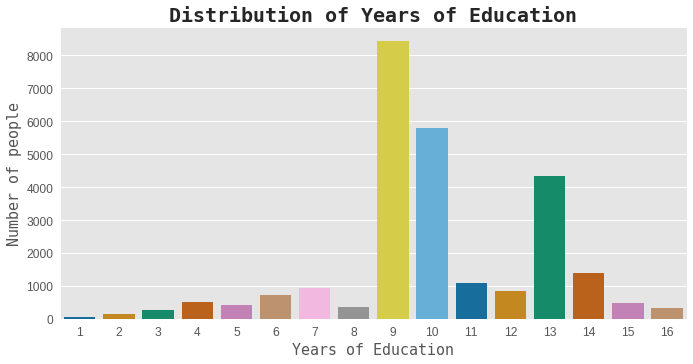

In [17]:
# Creating a barplot for 'Years of Education'
edu_num = train['education_num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')

plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})

plt.tick_params(labelsize=12)
plt.show()

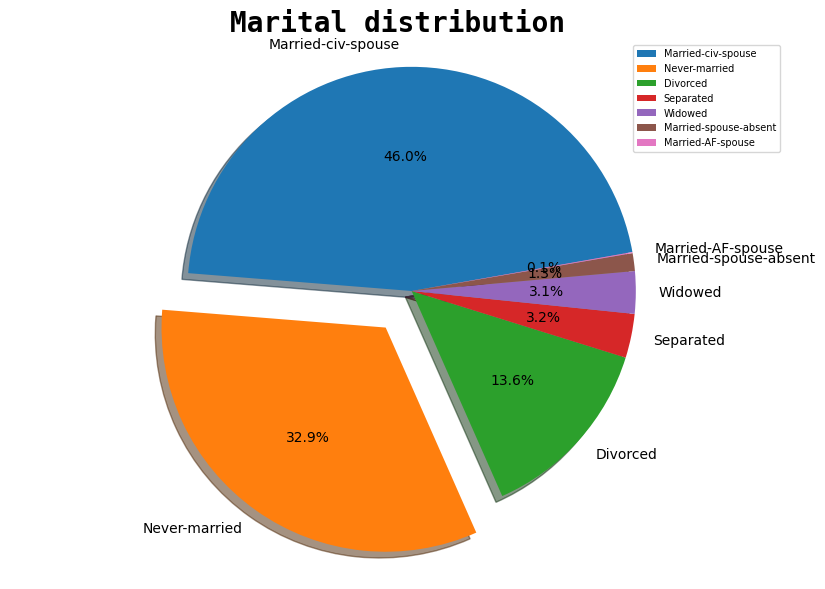

In [18]:
# Creating a pie chart for 'Marital status'
marital = train['marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, 
        labels=marital.index, startangle=10, 
        explode=(0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')

plt.title('Marital distribution', 
          fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})

plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

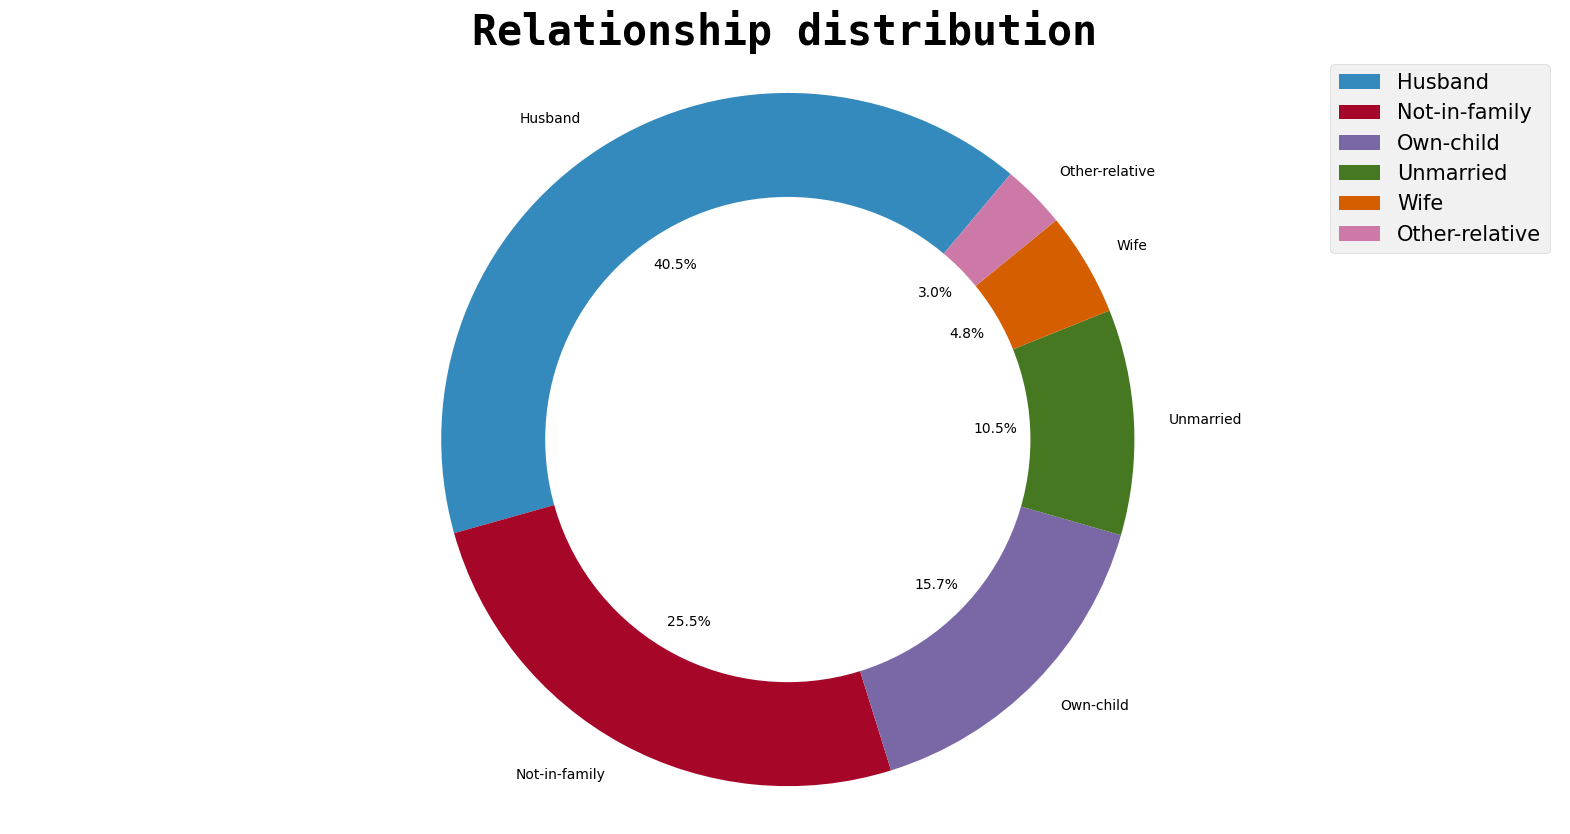

In [19]:
# Creating a donut chart for 'Age'
relation = train['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, 
        labels=relation.index,
        startangle=50, autopct='%1.1f%%')

centre_circle = plt.Circle((0, 0), 0.7, fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', 
          fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

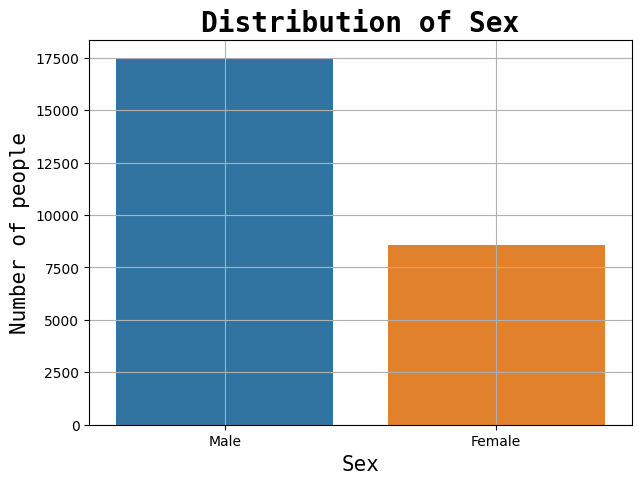

In [20]:
# Creating a barplot for 'Sex'
sex = train['sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)

plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})

plt.tick_params(labelsize=10)
plt.grid()
plt.show()

In [22]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
# Creating a Treemap for 'Race'
import squarify

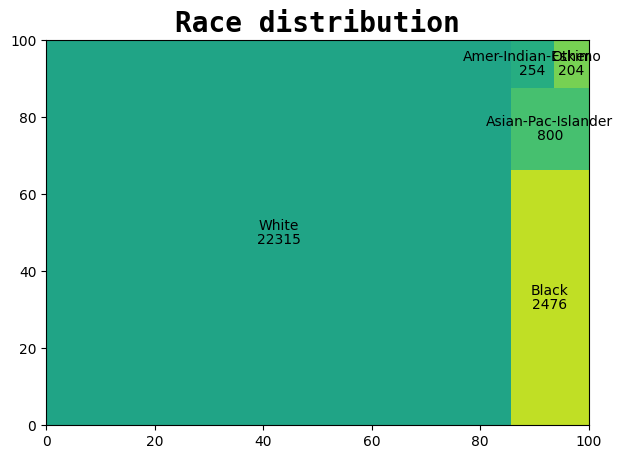

In [24]:
race = train['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
squarify.plot(sizes=race.values, label=race.index, value=race.values)

plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

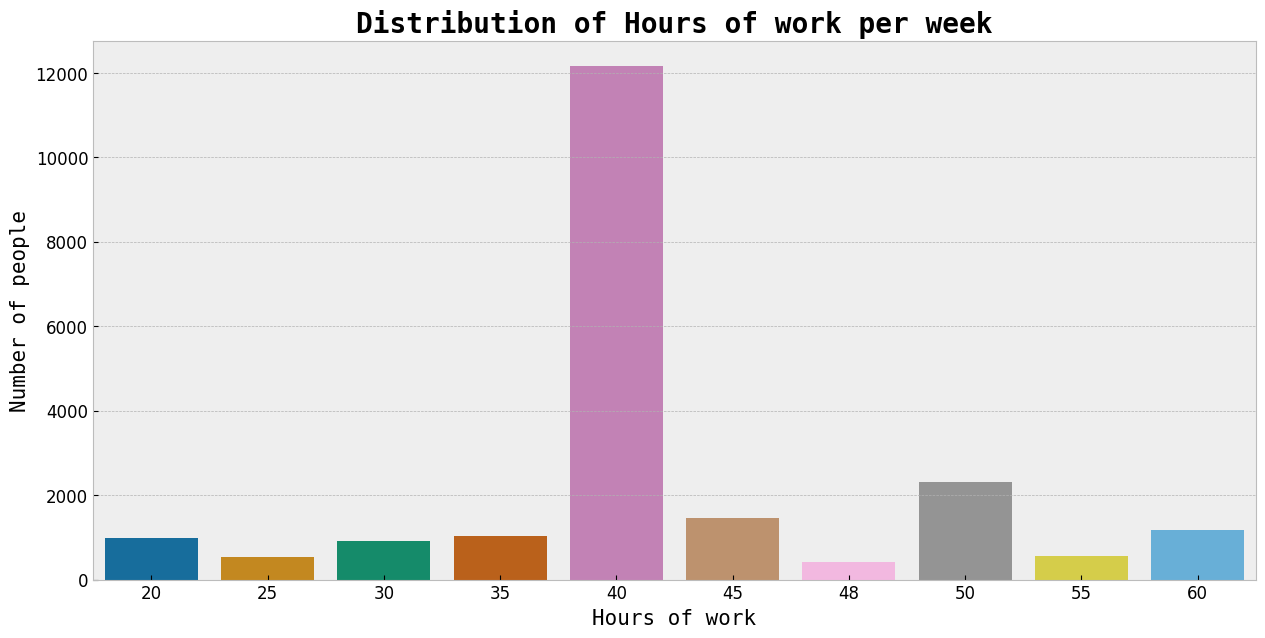

In [25]:
# Creating a barplot for 'Hours per week'
hours = train['hours_per_week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')

plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

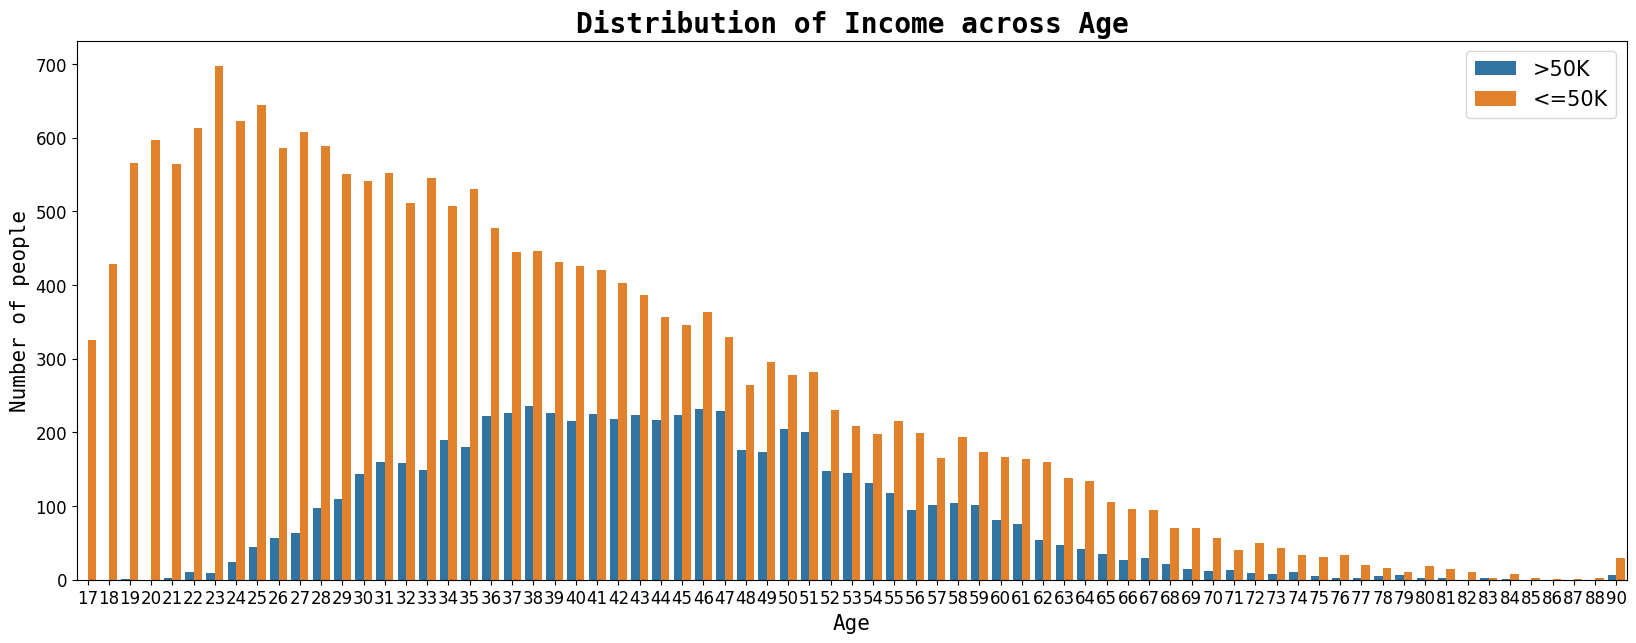

In [26]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(train['age'], hue=train['income'])

plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})

plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

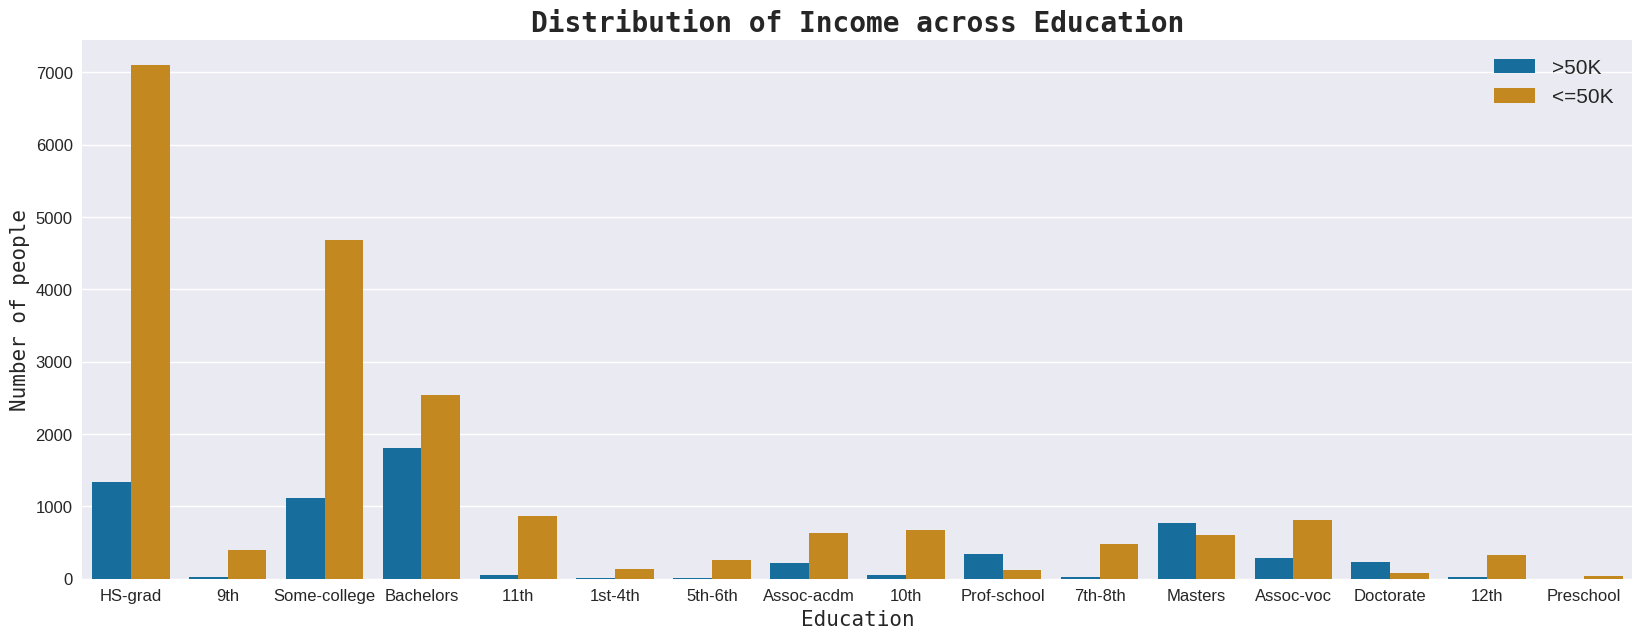

In [27]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(train['education'],
              hue=train['income'], 
              palette='colorblind')

plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})

plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

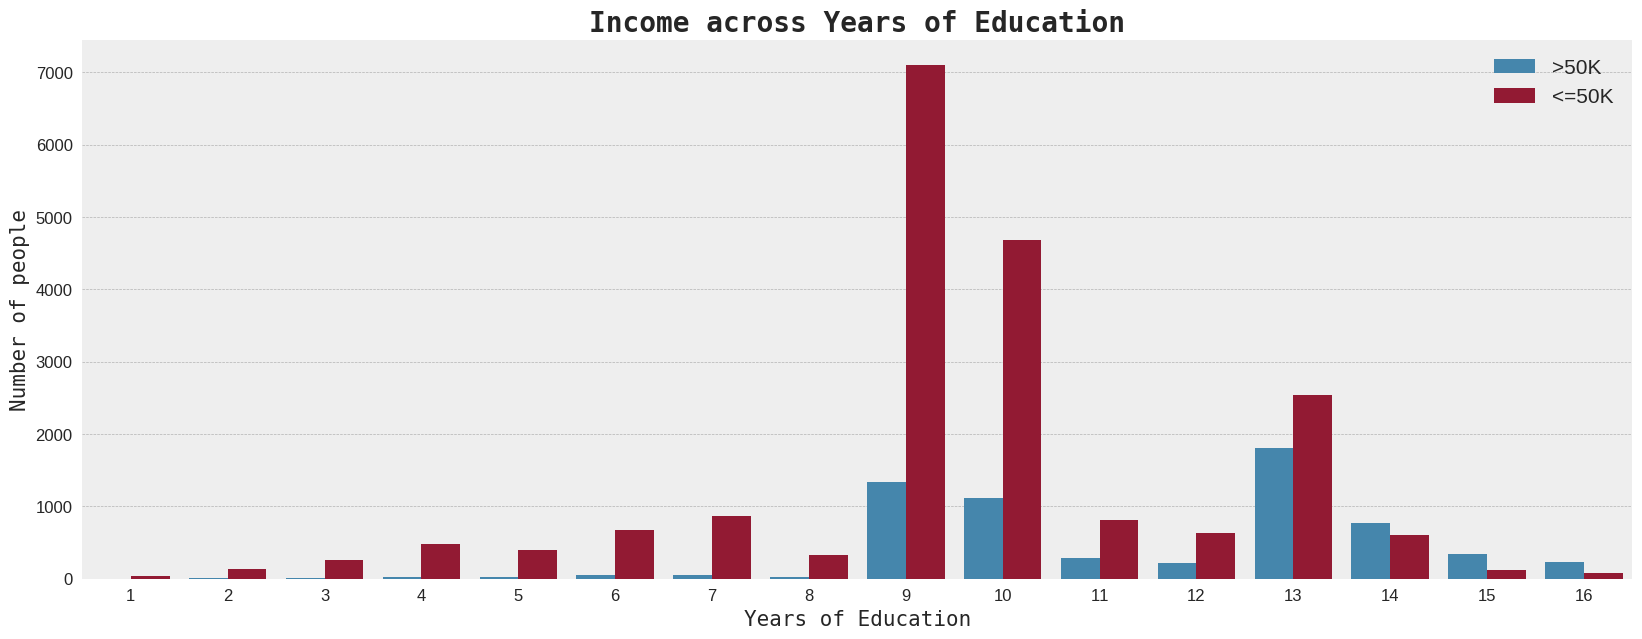

In [28]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(train['education_num'],
              hue=train['income'])

plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

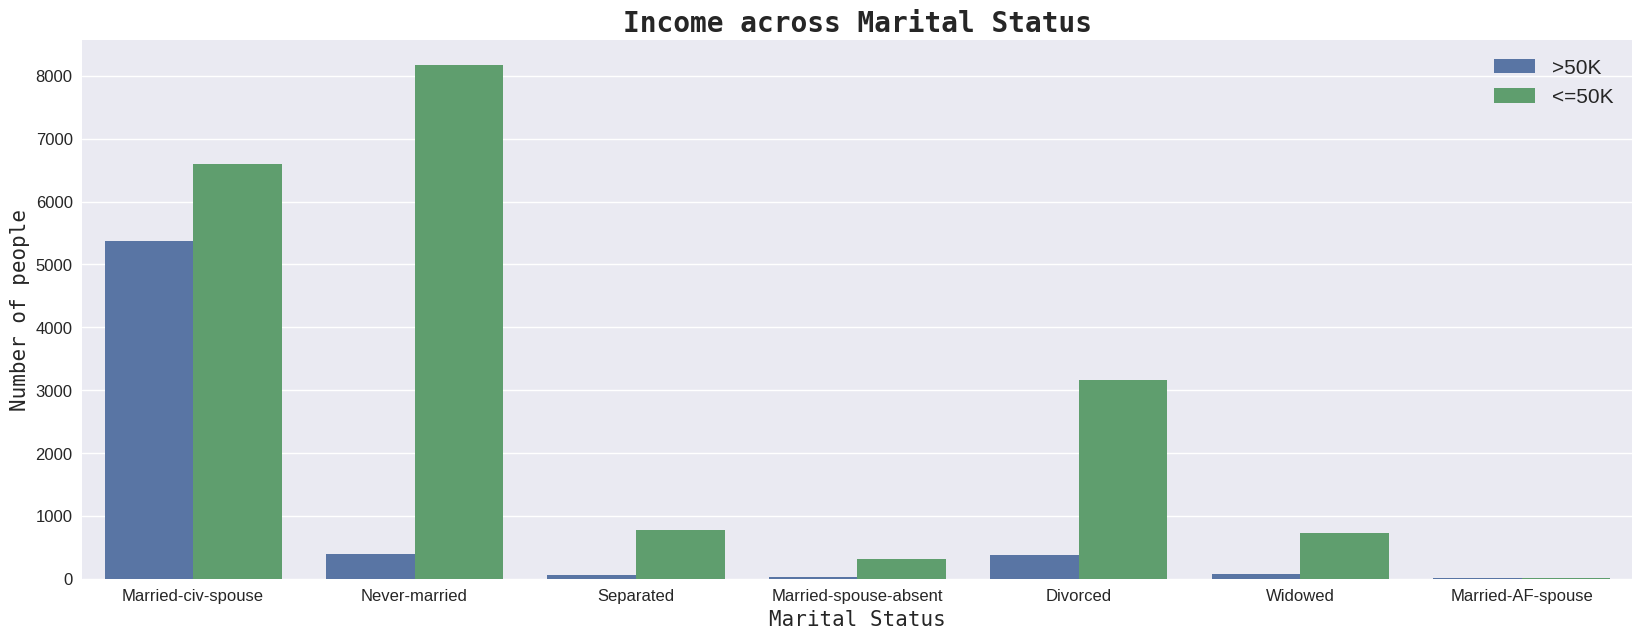

In [29]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(train['marital_status'], hue=train['income'])

plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})

plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

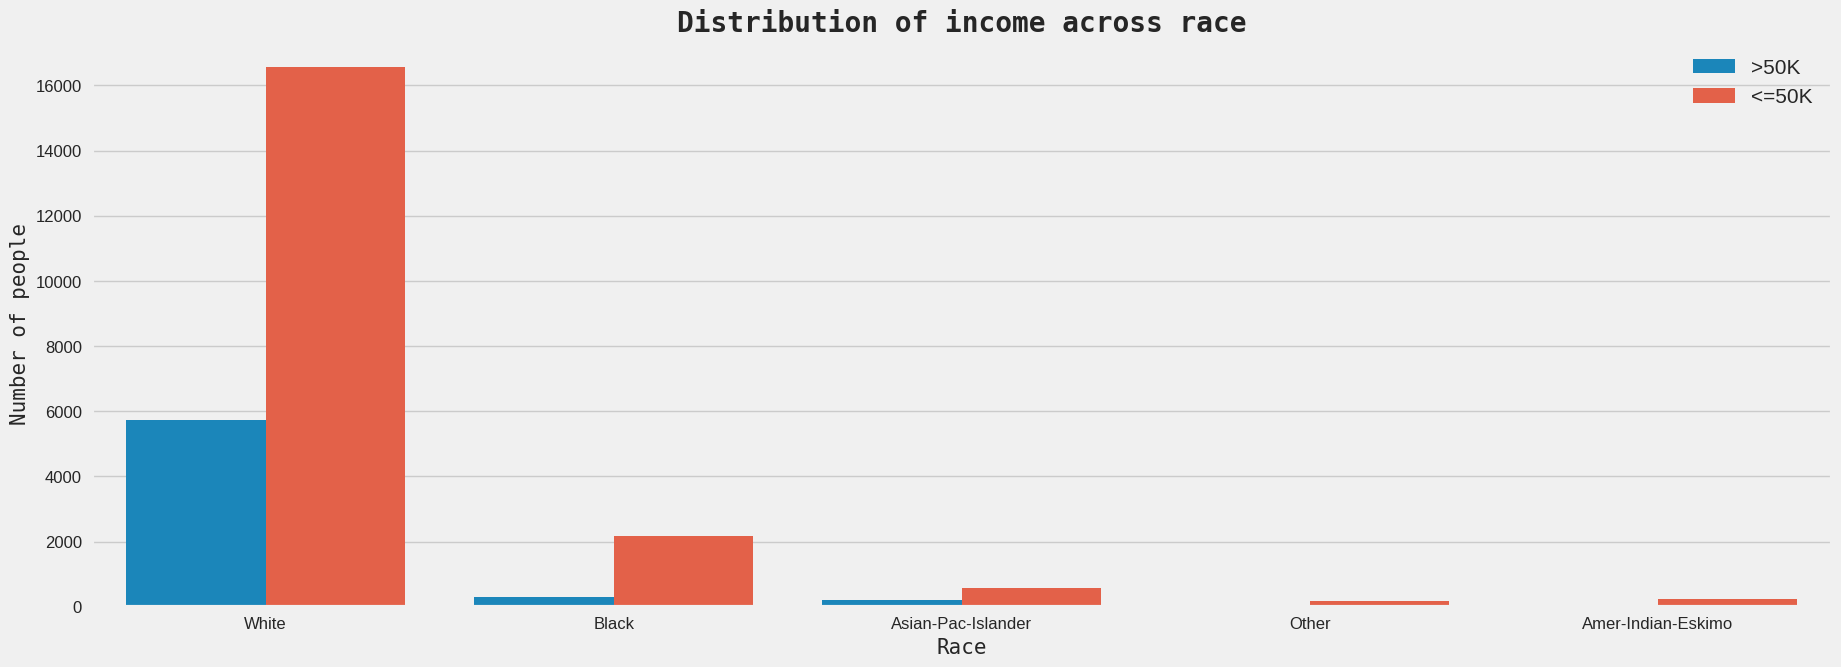

In [30]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(train['race'], hue=train['income'])

plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})

plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

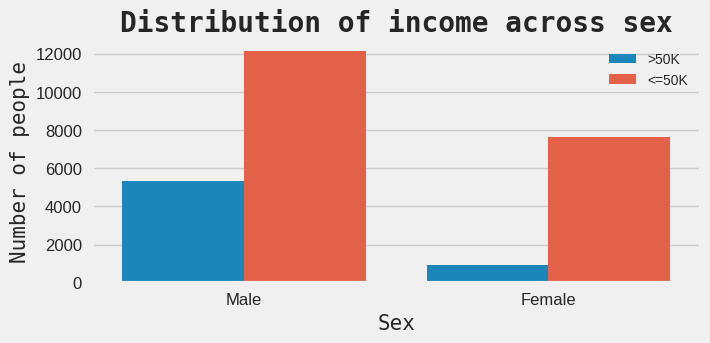

In [31]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(train['sex'], hue=train['income'])

plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})

plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

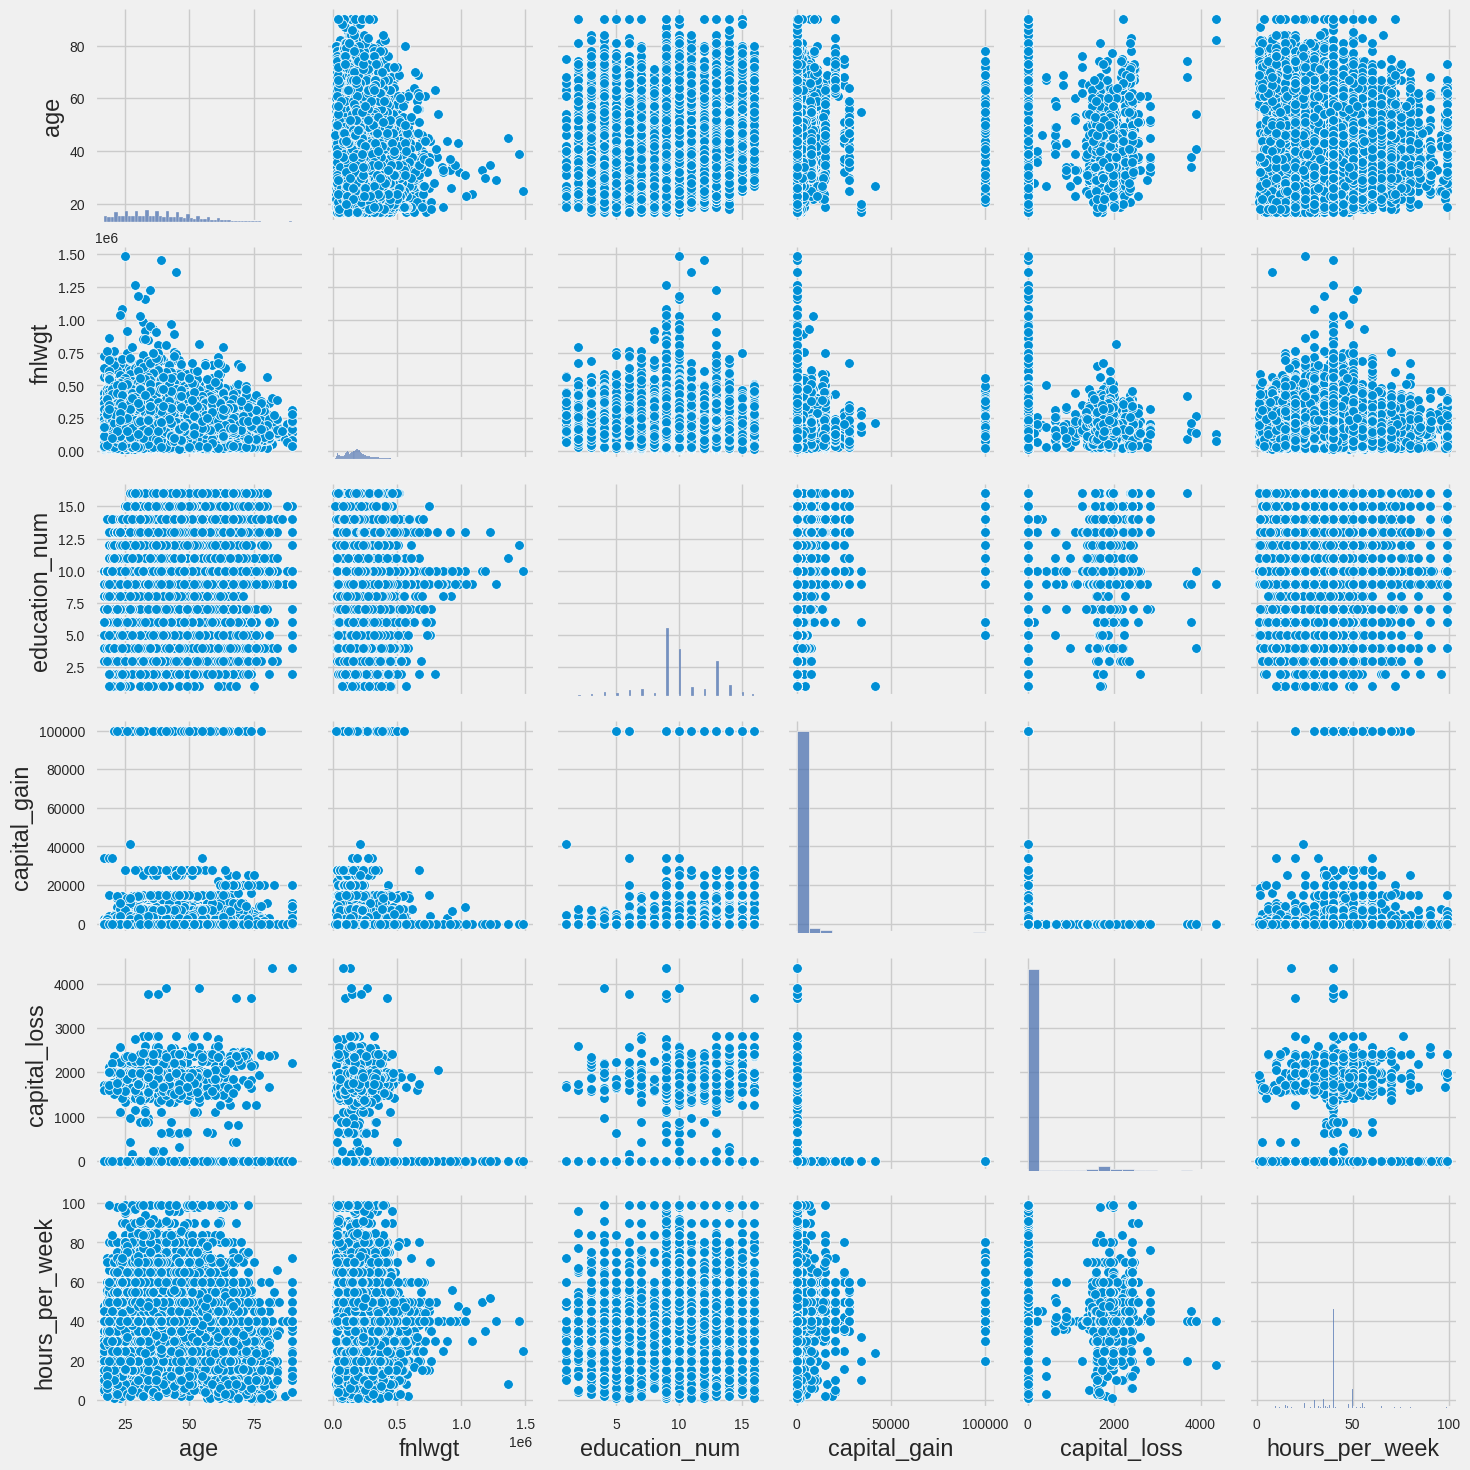

In [32]:
# Creating a pairplot of dataset
sns.pairplot(train)
plt.savefig('multi1.png')
plt.show()

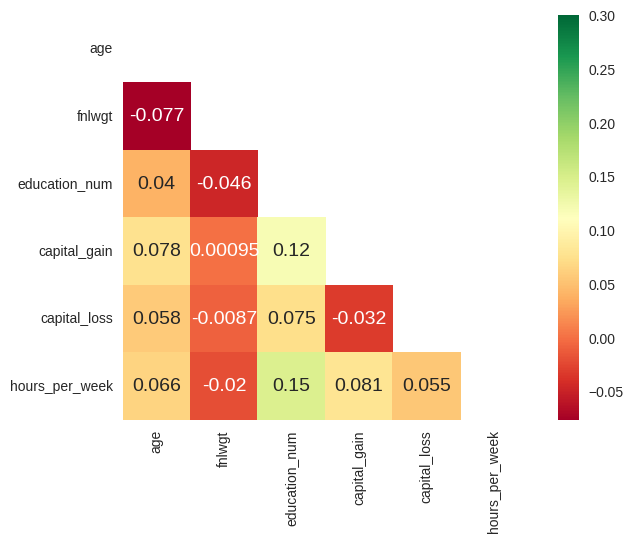

In [33]:
corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

In [34]:
import pycaret

print(pycaret.__version__)

2.3.10


In [38]:
pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
# pycaret 초기화
from pycaret.classification import *

clf = setup(data=train, 
            target='income',
            session_id=999, 
            high_cardinality_features=['native_country'], 
            use_gpu=False, 
            silent=True, 
            fix_imbalance=False, 
            normalize=True, 
            feature_selection=False)

ImportError: ignored